In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [5]:
titanic = sns.load_dataset("titanic")
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
data=titanic[[ 'age', 'sibsp', 'parch', 'fare', 'survived']]

In [12]:
data.fillna(data[['age', 'sibsp', 'parch', 'fare', 'survived']].mean(), inplace=True)


C:\Users\tesla\AppData\Local\Temp\ipykernel_12736\2815793920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data[['age', 'sibsp', 'parch', 'fare', 'survived']].mean(), inplace=True)


In [16]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

In [23]:
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


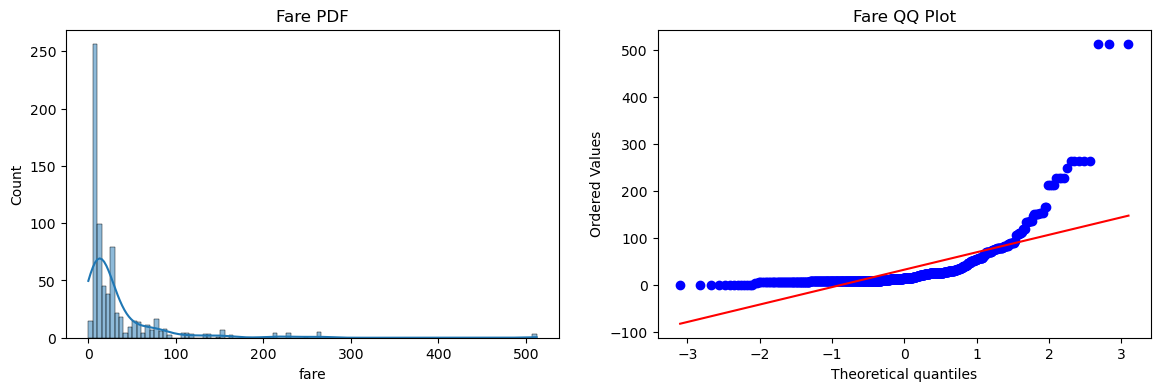

In [25]:
plt.figure(figsize=(14,4))

# PDF (Probability Density Function) Plot
plt.subplot(1,2,1)
sns.histplot(X_train['fare'], kde=True)  # Using histplot with KDE
plt.title('Fare PDF')

# QQ Plot
plt.subplot(1,2,2)
stats.probplot(X_train['fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression

In [47]:
def trans(x):
    tf=FunctionTransformer(func=x)
    X_train_=transformed=tf.fit_transform(X_train)
    X_test_=transformed=tf.fit_transform(X_test)
    dt = DecisionTreeRegressor()
    lr=LogisticRegression()
    dt_ = DecisionTreeRegressor()
    lr_=LogisticRegression()
    dt.fit(X_train,y_train)
    lr.fit(X_train,y_train)
    dt_.fit(X_train_,y_train)
    lr_.fit(X_train_,y_train)
    print('Before transformation')
    print(lr.score(X_test,y_test))
    print(dt.score(X_test,y_test))
    print('After transformation')
    print(lr_.score(X_test_,y_test))
    print(dt_.score(X_test_,y_test))
    print("plot")
    beaf(x,X_train_)
    return 
    
    

In [48]:
def beaf(x,X_train_):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    stats.probplot(X_train['fare'], dist='norm', plot=plt)
    plt.title(f'befor {x} Fare QQ Plot')
    # QQ Plot
    plt.subplot(1,2,2)
    stats.probplot(X_train_['fare'], dist='norm', plot=plt)
    plt.title(f'after {x} Fare QQ Plot')
    plt.show()
    

c:\Users\tesla\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tesla\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Before transformation
0.6815642458100558
-0.4146546196342116
After transformation
0.7039106145251397
-0.35834116332075516
plot


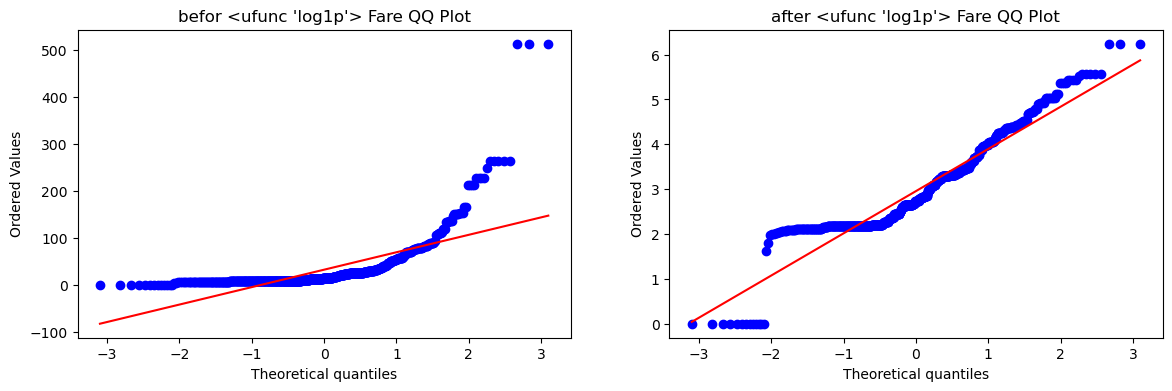

In [50]:
trans(np.log1p)
# trans(lambda x : 1/(x+0.000001))